# Markov e Markov Oculto
Na teoria das probabilidades, um modelo de Markov é um modelo estocástico usado para modelar sistemas que mudam aleatoriamente. Supõe-se que os estados futuros dependam apenas do estado atual, não dos eventos que ocorreram antes dele (ou seja, assume-se a propriedade Markov).

A aplicação do Modelo de Markov oculto (Hidden Markov Models) inclui aprendizado por reforço e reconhecimento de padrões temporais, como fala, escrita, reconhecimento de gestos, marcação de parte do discurso, acompanhamento de partituras, descargas parciais e bioinformática.


In [0]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

## Modelo de Markov para gerar texto
Reveja a teoria aplicada aqui em suas notas de aula, quando usamos uma parte do poema *E agora, José?*, de Carlos Drummond de Andrade.

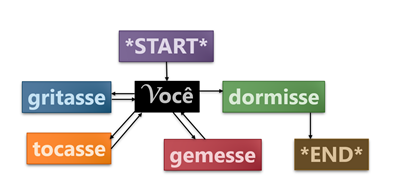


In [0]:
from google.colab import files

uploaded = files.upload()
#Aqui eu importei o discurso de Martir Lutter King, I have a dream
#Aqui você fará upload do arquivo (disponível no Moodle):
# IHaveADream_MartinLutherKingJr.txt 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IHaveADream_MartinLutherKingJr.txt to IHaveADream_MartinLutherKingJr.txt
Saving Indios_RenatoRusso.txt to Indios_RenatoRusso.txt
Saving OAstronautaDeMarmore_NenhumDeNos.txt to OAstronautaDeMarmore_NenhumDeNos.txt
User uploaded file "IHaveADream_MartinLutherKingJr.txt" with length 9171 bytes
User uploaded file "Indios_RenatoRusso.txt" with length 2042 bytes
User uploaded file "OAstronautaDeMarmore_NenhumDeNos.txt" with length 812 bytes


In [0]:
discurso = open('OAstronautaDeMarmore_NenhumDeNos.txt', encoding='utf8').read()
#display the data
print(discurso)

A lua inteira agora é um manto negro oh oh
O fim das vozes no meu rádio oh oh
São quatro ciclos no escuro deserto do céu
Quero um machado pra quebrar o gelo oh oh
Quero acordar do sonho agora mesmo oh oh
Quero uma chance de tentar viver sem dor
Sempre estar lá e ver ele voltar
Não era mais o mesmo mas estava em seu lugar
Sempre estar lá e ver ele voltar
O tolo teme a noite como a noite vai temer o fogo
Vou chorar sem medo
Vou lembrar do tempo
De onde eu via o mundo azul
A trajetória escapa o risco nu uh uh
As nuvens queimam o céu nariz azul uh uh
Desculpe estranho eu voltei mais puro do céu
A lua o lado escuro é sempre igual al al
No espaço a solidão é tão normal al al
Desculpe estranho eu voltei mais puro do céu
Sempre estar lá
E ver ele voltar
Não era mais o…


In [0]:
# 'Split' o discurso em um conjunto de palavras individuais 
palavras = discurso.split()
print(palavras)

['A', 'lua', 'inteira', 'agora', 'é', 'um', 'manto', 'negro', 'oh', 'oh', 'O', 'fim', 'das', 'vozes', 'no', 'meu', 'rádio', 'oh', 'oh', 'São', 'quatro', 'ciclos', 'no', 'escuro', 'deserto', 'do', 'céu', 'Quero', 'um', 'machado', 'pra', 'quebrar', 'o', 'gelo', 'oh', 'oh', 'Quero', 'acordar', 'do', 'sonho', 'agora', 'mesmo', 'oh', 'oh', 'Quero', 'uma', 'chance', 'de', 'tentar', 'viver', 'sem', 'dor', 'Sempre', 'estar', 'lá', 'e', 'ver', 'ele', 'voltar', 'Não', 'era', 'mais', 'o', 'mesmo', 'mas', 'estava', 'em', 'seu', 'lugar', 'Sempre', 'estar', 'lá', 'e', 'ver', 'ele', 'voltar', 'O', 'tolo', 'teme', 'a', 'noite', 'como', 'a', 'noite', 'vai', 'temer', 'o', 'fogo', 'Vou', 'chorar', 'sem', 'medo', 'Vou', 'lembrar', 'do', 'tempo', 'De', 'onde', 'eu', 'via', 'o', 'mundo', 'azul', 'A', 'trajetória', 'escapa', 'o', 'risco', 'nu', 'uh', 'uh', 'As', 'nuvens', 'queimam', 'o', 'céu', 'nariz', 'azul', 'uh', 'uh', 'Desculpe', 'estranho', 'eu', 'voltei', 'mais', 'puro', 'do', 'céu', 'A', 'lua', 'o', 

In [0]:
#Criando pares de palavras chave e as palavras seguintes 
#Para economizar espaço, uses um objeto generator (vide aula do Thiago).
def make_pairs(palavras):
  for i in range(len(palavras) - 1):
    yield (palavras[i], palavras[i + 1])
pairs = make_pairs(palavras)

In [0]:
#Em seguida, vamos inicializar um dicionário vazio para armazenar os pares de palavras.
palavra_dict = {}
#Caso a primeira palavra do par (palavra chave) já seja uma chave no dicionário, basta anexar a próxima 
#palavra potencial à lista de palavras que seguem a palavra chave. Mas se a palavra não for uma chave, 
#crie uma nova entrada no dicionário e atribua a chave igual à primeira palavra do par.
#Caso fique confuso, veja a teoria, quando usamos o poema "E agora, José?"
for palavra_1, palavra_2 in pairs:
  if palavra_1 in palavra_dict.keys():
    palavra_dict[palavra_1].append(palavra_2)
  else:
    palavra_dict[palavra_1] = [palavra_2]

In [0]:
# Modelo de Markov
#Vamos pegar uma palavra aleatória para iniciar nosso texto 
#(deverá se iniciar com letra maiúscula para não pegarmos palavra no meio do texto) 
start_palavra = np.random.choice(palavras)
while start_palavra.islower():
  start_palavra = np.random.choice(palavras)
chain = [start_palavra]
print(chain)
#Número total de palavras que terá nosso discurso
n_palavras = 20
for i in range(n_palavras):
  chain.append(np.random.choice(palavra_dict[chain[-1]]))

['Não']


In [0]:
#Finalmente, vamos exibir o texto  gerado
# 'join' retorna a nossa cadeia de palavras 'chain' como uma string
print(' '.join(chain))

Não era mais puro do tempo De onde eu voltei mais o fogo Vou lembrar do céu Quero acordar do tempo


O texto pode não fazer muito sentido, mas serve para você entender, de maneira simples, como as cadeias de Markov podem ser usadas para gerar textos automaticamente.

Agora, vamos ver mais algumas aplicações das cadeias de Markov e como elas são usadas para resolver problemas do mundo real.

**Google PageRank**: toda a web pode ser vista como um modelo de Markov, onde cada página da web pode ser um estado e os links ou referências entre essas páginas podem ser vistos como transições com probabilidades. Então, basicamente, independentemente de qual página da Web você começa a navegar, a chance de chegar a uma determinada página X da Web é uma probabilidade fixa.

**Previsão de digitação de palavras em telefones celulares**: Sabe-se que as cadeias de Markov são usadas para prever as próximas palavras ou preenchimento automático e sugestões. O aplicativo irá adivinhar qual é a sua próxima palavra mais provável com base nas combinações de palavras que você digitou antes (por exemplo, *dia* depois de *bom*" ou *como vai* com base em *Oi*). Da mesma maneira, ao completar as palavras, o algoritmo se baseia nas palavras que você repete várias vezes e, quanto mais vezes já apareceu, maior a probabilidade de aparecer novamente.

**Gerador de texto**: as cadeias de Markov são mais comumente usadas para gerar textos fictícios ou produzir grandes ensaios e compilar discursos. Também são usadas nos geradores de nome.

<font color='green'> 

### Seu trabalho </font> 


<font color='green'>

Vocês farão um gerador de [Fake News](https://towardsdatascience.com/using-a-markov-chain-sentence-generator-in-python-to-generate-real-fake-news-e9c904e967e). O programa está completo, e muito bem explicado. Pode ser que você precise procurar alguns comandos na internet para entendê-los melhor, mas o texto do link explica em detalhes o que exatamente cada parte do programa faz.
</font> 

<font color='green'>

Se você está familiarizado com programação, ou gosta muito de desafios, pode gerar notícias seguindo a programação em [Markov](https://filiph.github.io/markov/).
</font>

<font color='green'>

**Mas veja bem:**
usar o primeiro link já é desafio o suficiente para o nível que estamos. O segundo exige uma capacidade de programação compatível somente com aqueles que já tem uma base sólida de programação, vinda da graduação.
</font>

## Cadeia de Markov
A cadeia de Markov possui estados possíveis

\begin{equation}
 \begin{bmatrix}
S_1 & S_2 & ... & S_n \\ 
\end{bmatrix}
\end{equation}

E a probabilidade de transição de estado $\mathbf{A}$ (matriz $n \times n$)

\begin{equation}
a_{ij}=P\left( x_{t+1}=S_i | x_t=S_j \right)
\end{equation}

Dado o estado inicial
$X_0=P\left(x_{0_i}=S_i\right)$

A transição do estado $\mathbf{X}_{t}$ para o estado $\mathbf{X}_{t+n}$ é dada por,

\begin{equation}
\mathbf{X}_{t+n} = \mathbf{A}^n\mathbf{X}_{t}
\end{equation}

Sabe-se que, para uma matriz de transição $\mathbf{A}$ constante, a cadeia de Markov leva a um estado estacionário $\bar{\mathbf{X}}$, sendo que:

\begin{equation}
\bar{\mathbf{X}} = \bar{\mathbf{X}}\mathbf{A}
\end{equation}

ou, ainda, tem-se a matriz de transição estabilizada, $\bar{\mathbf{A}}$, dada por,

\begin{equation}
\bar{\mathbf{X}} = \mathbf{X}_0 \bar{\mathbf{A}}
\end{equation}

A partir da equação da estacionariedade $\bar{\mathbf{X}} \mathbf{A} = \bar{\mathbf{X}}$, podemos ver que ${\mathbf{X}}$ deve ser um autovetor à esquerda de $\mathbf{A}$ com um autovalor $1$. 

Por exemplo, para uma matriz $\mathbf{A}$ $3 \times 3$, tem-se:

\begin{equation}
\begin{split}
  &\bar{x}_1 a_{11} + \bar{x}_2 a_{21} + \bar{x}_3 a_{31} &= \bar{x}_1 \\
  &\bar{x}_1 a_{12} + \bar{x}_2 a_{22} + \bar{x}_3 a_{32} &= \bar{x}_2 \\
  &\bar{x}_1 a_{13} + \bar{x}_2 a_{23} + \bar{x}_3 a_{331} &= \bar{x}_3 \\
\end{split}
\end{equation}
e
\begin{equation}
\bar{x}_1 + \bar{x}_2 + \bar{x}_3 = 1
\end{equation}

Em python, `np.linalg.solve` resolve um sistema de equações lineares. E usaremos as equações acima para gerar um sistema:

\begin{equation}
\begin{split}
  &\bar{x}_1 \left(a_{11}-1\right) &+ \bar{x}_2 a_{21} &+ \bar{x}_3 a_{31} &= 0 \\
  &\bar{x}_1 \left(a_{12}-1\right) &+ \bar{x}_2 a_{22} &+ \bar{x}_3 a_{32} &= 0 \\
  &\bar{x}_1 \left(a_{13}-1\right) &+ \bar{x}_2 a_{23} &+ \bar{x}_3 a_{331} &= 0 \\
  &\bar{x}_1       &+ \bar{x}_2 &+ \bar{x}_3 &= 1
  \end{split}
\end{equation}

e resolvê-lo com `np.linalg.solve`.

Entenda mais [brincando](https://setosa.io/ev/markov-chains/).

Veja o exemplo a seguir.

### Exemplo Marcas de fast food

Queremos analisar a transação de clientes em uma área de alimentação de um shopping. Analisamos os clientes almoçando nos três lugares mostrados. A probabilidade do cliente voltar no dia seguinte ou ir para outro lugar é definida conforme a matriz de transição 
\begin{equation}
\mathbf{A} = \begin{bmatrix}
0.8 & 0.1 & 0.1 \\
0.2 & 0.7 & 0.1 \\
0.1 & 0.3 & 0.6 \\ 
\end{bmatrix}
\end{equation}

1. Dados os estados iniciais $𝑿_0=\left[0.4 \quad 0.24 \quad 0.36 \right]$, defina a distribuição provável de 500 clientes no dia seguinte.
1. Plote o gráfico das variáveis em função das iterações.
2. Encontre a distribuição estável $\bar{\mathbf{X}}$.
1. Encontre a matriz de transição estável, $\bar{\mathbf{A}}$.
2. Encontre $\bar{\mathbf{X}}$ para diferentes entradas $𝑿_0$ usando $\bar{\mathbf{A}}$ obtida no item anterior.





1. O número de pessoas que irão aos locais 0,1,2 serão: 0    200.0
1    120.0
2    180.0
Name: 0, dtype: float64
Item 2


<Figure size 432x288 with 0 Axes>

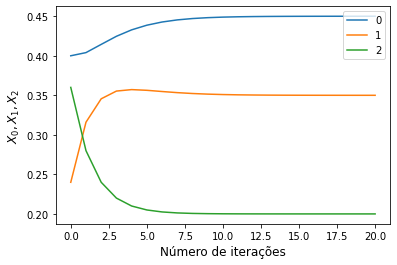

In [0]:
A = np.array([[0.8, 0.1, 0.1],
              [0.2, 0.7, 0.1],
              [0.1, 0.3, 0.6]])
state=np.array([[0.4, 0.24, 0.36]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
plt.figure()
for x in range(20):
  state=np.dot(state,A)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
#Item 1
value_500 = 500*dfDistrHist.iloc[0]
print('1. O número de pessoas que irão aos locais 0,1,2 serão:',value_500)
#Item 2
print('Item 2')
plt.xlabel('Número de iterações', fontsize = 12)
plt.ylabel('$X_0,X_1, X_2$', fontsize = 12)
plt.legend()
plt.show()

In [0]:
# Faremos um sistema linear para resolver com np.linalg.solve
#Para isso precisamos unir todas as equações conforme explicado no texto 
A2 = np.append(A.T-np.identity(3),[[1,1,1]],axis=0)
b = (np.array([0,0,0,1])).T
xbar = np.linalg.solve(A2.T.dot(A2), A2.T.dot(b))
#Item 3
print('3. A distribuição estável é dada por:',xbar)
#Item 4
Abar = np.array([xbar,xbar,xbar])
print('4. A matriz de transformação estável é dada por:',Abar)
#Item 5
#Estado inicial 1:
print('5. Independente do estado inicial, o estado estacionário é o mesmo:')
print(state.dot(Abar))
state2=np.array([[0.1, 0.5, 0.4]])
print(state2.dot(Abar))
state3=np.array([[0.3, 0.5, 0.2]])
print(state2.dot(Abar))

3. A distribuição estável é dada por: [0.45 0.35 0.2 ]
4. A matriz de transformação estável é dada por: [[0.45 0.35 0.2 ]
 [0.45 0.35 0.2 ]
 [0.45 0.35 0.2 ]]
5. Independente do estado inicial, o estado estacionário é o mesmo:
[[0.45 0.35 0.2 ]]
[[0.45 0.35 0.2 ]]
[[0.45 0.35 0.2 ]]


### Exemplo da Loja de Doces
Temos duas lojas de doces, $A$ e $B$. Sabe-se,a través de pesquisas, que $30\%$ dos clientes da loja $A$ vão para loja $B$ todo mês, e $20\%$ dos clientes da loja $B$ vão para loja $A$ todo mês. Qual a matriz de distribuição estabilizada $\bar{\mathbf{A}}$ e, supondo que tenhamos 200 clientes ao total, como se distribuirão no estado estacionário?

In [0]:
 #Sua resposta
 

In [0]:
#Resposta:
A = np.array([[0.7,0.3],[0.2,0.8]])
A2 = np.append(A.T-np.identity(2),[[1,1]],axis=0)
b = (np.array([0,0,1])).T
xbar = np.linalg.solve(A2.T.dot(A2), A2.T.dot(b))
print('A distribuição estável é dada por:',xbar)
Abar = np.array([xbar,xbar,xbar])
print('A matriz de transformação estável é dada por:',Abar)
print('Para 200 clientes ao total, tem-se a seguinte distribuição nas lojas A e B, respectivamente,'
       ,int(round(xbar[0]*200)),'e',int(round(xbar[1]*200)))

A distribuição estável é dada por: [0.4 0.6]
A matriz de transformação estável é dada por: [[0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]]
Para 200 clientes ao total, tem-se a seguinte distribuição nas lojas A e B, respectivamente, 80 e 120


### Exemplo de análise de lealdade à marca
Três marcas $A,B,C$ foram analisadas e verificou-se que:


*   Na marca $A$: $10\%$ dos clientes se movem para $B$ e $10\%$ se movem para $C$
*   Na marca $B$: $20\%$ dos clientes se movem para $A$ e $20\%$ se movem para $C$
*   Na marca $C$: $10\%$ dos clientes se movem para $A$ e $20\%$ se movem para $B$

Encontre a matriz de distribuição estabilizada e o vetor de estabilização.



In [0]:
#Resposta: Você deve encontrar xbar = [8/19, 5/19, 6/19]

### Cadeias de Markov com estados absorventes
Um estado da cadeia de Markov é chamado de *estado absorvente* se $a_{ii} = 1 $ e, por consequência, qualquer valor da linha $i$, $a_{ij}, i \neq j$, vale $0$. Uma cadeia de Markov é dita absorvente se existe ao menos um estado absorvente, ou se for possível, a partir de qualquer estado, atingir um estado absorvente, não necessariamente em um único passo.

Veja a figura abaixo. Veja que a matriz da figura é definida como:
\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.2 & 0.7 & 0.1 \\
0.3 & 0.1 & 0.6 \\ 
\end{bmatrix}
\end{equation}

Dessa forma, 
\begin{equation}
\mathbf{A}^2 = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.37 & 0.50 & 0.13 \\
0.50 & 0.13 & 0.37 \\ 
\end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{A}^3 = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.509 & 0.363 & 0.128 \\
0.637 & 0.128 & 0.235 \\ 
\end{bmatrix}
\end{equation}

Se formos adiante, perceberemos que a primeira coluna os valores crescem, se aproximando de 1, a primeira linha se mantém constante, e os demais valores estão indo para zero. Veja, por exemplo,

\begin{equation}
\mathbf{A}^5 = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.707 & 0.198 & 0.095 \\
0.802 & 0.095 & 0.103 \\ 
\end{bmatrix}
\end{equation}

Eventualmente, o estado estacionário leva a:
\begin{equation}
\bar{\mathbf{A}} = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\ 
\end{bmatrix}
\end{equation}
isto é,
\begin{equation}
\bar{X} = \begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
\end{equation}

Isto é, o estado $A$ absorve todo o universo analisado.

Foi usada a palavra *eventualmente* no texto acima. Veja o exemplo de um estudo realizado pela Universidade da Carolina do Norte em pacientes de um determinado hospital. O problema foi modelado por uma cadeia de Markov: $0$ (morto), $1$ (estado desfavorável), $2 $(estado favorável). A matriz de transição tem um ciclo de 72 horas,

\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.085 & 0.779 & 0.136 \\
0.017 & 0.017 & 0.966 \\ 
\end{bmatrix}
\end{equation}

Perceba que $a_{11} = 1$, ou seja, $S_1$ é um estado de absorção, uma vez que o paciente morto, a cada passo ele continuará morto. Os estados $2$ e $3$ são
os estados de transição, e a partir de qualquer um destes é possível chegar no estado de absorção. Daí, a cadeia é absorvente. Porém, não é sensato acreditar que todos os pacientes acabarão mortos. Então, a matriz de transformação estabilizada é diferente daquela mostrada anteriormente.

Um [estudo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828134/) realizado pela universidade de medicina do Texas em pacientes em UTI de um determinado hospital foi modelado por uma cadeia de Markov, com 8 estados possíveis após o primeiro dia de internação na unidade de terapia intensiva foram avaliados para cada paciente de UTI: enfermaria do mesmo hospital (W); Enfermaria de outro hospital, não UTI ou estar em outro hospital após a alta da UTI para outro hospital (B); UTI de outro hospital (O); Unidade de alta dependência ou área de atendimento intermediário mesmo hospital (U); mesma UTI ou outra UTI dentro do mesmo hospital (I); outro local mesmo hospital (H), saída (E) e óbito (D). Cada destino identifica um estado na cadeia de Markov. **Leia o artigo e veja uma aplicação clara do modelo.**


#### Forma canônica da matriz $\mathbf{A}$
Uma cadeia de Markov absorvente com matriz de transição $\mathbf{A}$ possui $t$ estados transientes  e $r$ estados absorventes. Pode-se reescrever a matriz em sua forma canônica,

\begin{equation}
\bar{\mathbf{A}} = \begin{bmatrix}
\mathbf{I} & \mathbf{0} \\
\mathbf{R} & \mathbf{Q} 
\end{bmatrix}
\end{equation}

onde $\mathbf{I}$ é a matriz (identidade) que contém as probabilidades de transição entre estados absorventes; $\mathbf{0}$ é a matriz nula, indicando que não existem transições dos estados absorventes para os estados transientes; $\mathbf{R}$  é a matriz que contém as probabilidades de transição dos estados transientes para os estados absorventes; $\mathbf{Q}$  é a matriz que contém as probabilidades de transição entre estados transientes.

Pode-se provar que os elementos da matriz
\begin{equation}
\left(\mathbf{I} - \mathbf{Q} \right)^{-1} \mathbf{R}
\end{equation}
são as probabilidades estacionárias de
absorção. Alternativamente, chegava-se à mesma conclusão se se considerasse a matriz $\mathbf{A}^n$ quando $n \rightarrow\infty$.

Dessa forma, pode-se dizer que a matriz de transição estabilizada é dada por,

\begin{equation}
\bar{\mathbf{A}} = \left[ \begin{array}{c|c}
\mathbf{I} & \mathbf{0} \\
  \hline
\left(\mathbf{I} - \mathbf{Q} \right)^{-1} \mathbf{R} & \mathbf{0} 
\end{array}\right]
\end{equation}

A matriz $\left(\mathbf{I} - \mathbf{Q} \right)^{-1}$ é chamada *matriz fundamental da cadeia de Markov*, tendo os seus elementos um significado especial: o elemento $(i,j)$ representa o número esperado de
vezes passa-se pelo estado transiente $j$ antes do processo entrar num estado absorvente qualquer, partindo do estado transiente $i$. 

<font color='green'>

####Seu trabalho </font>

<font color='green'> Para as duas matrizes abaixo,
</font>
<font color='green'> 
\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 &  0.0 & 0.0 \\
0.0 & 1.0 &  0.0 & 0.0 \\
0.2 & 0.2 &  0.5 & 0.1 \\
0.3 & 0.1 &  0.2 & 0.4 \\ 
\end{bmatrix}
\end{equation}
</font>
<font color='green'> 
\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.4 & 0.3 & 0.3 \\
0.3 & 0.2 & 0.5 \\ 
\end{bmatrix}
\end{equation}
</font>
<font color='green'> 
1.   Encontre a matriz estabilizada de transição de estado;
2.   Encontre $\left(\mathbf{I} - \mathbf{Q} \right)^{-1} \mathbf{R}$. 
1.   Plote em um gráfico a evolução até a resposta estabilizar.
1.   Explique o significado dos valores encontrados para $\left(\mathbf{I} - \mathbf{Q} \right)^{-1}$ e $\left(\mathbf{I} - \mathbf{Q} \right)^{-1} \mathbf{R}$
2.   Use diferentes valores de $\mathbf{X}_0$ e verifique os valores encontrados. Qual sua conclusão?

</font>



## Markov oculto

Iremos aplicar o algoritmo de Viterbi para resolver um problema de decodificação, isto é, dada uma sequência de observações $\mathbf{O}$ e o modelo $\left[ 𝑨,𝑩,\pi\right]$, qual a melhor sequência de estados $\mathbf{S}$ dentro do modelo capaz de gerar essas observações?

Existem implementações do algoritmo de Viterbi disponibilizados para uso, como [aqui](https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py). Seu maior trabalho será entender a implementação. Entenda linha por linha do algoritmo que escolher, e para isso, você aplicará vários conhecimentos adquiridos nas aulas de Python.

[Neste link](https://nbviewer.jupyter.org/gist/BenLangmead/7460513) você encontrará o programa e alguns exemplos já prontos.
Abaixo o algoritmo que escolhi para trabalhar (fique à vontade em mudar).

In [0]:
# define Viterbi algorithm for shortest path
# code adapted from Stephen Marsland's, Machine Learning An Algorthmic Perspective, Vol. 2
# https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py
def viterbi(pi, a, b, obs):
 
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
 
    # init blank path
    path = np.zeros(T)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
 
    # init delta and phi
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0
 
    print('\nStart Walk Forward\n')
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]]
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
 
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    print(phi)
    for t in range(T-2, -1, -1):
        print(t+1, path[t+1])
        path[t] = phi[int(path[t+1]), t+1]
        print('path[{}] = {}'.format(t, path[t]))
 
    return path, delta, phi


### Exemplo 01
Suponha que aos domingos seu amigo sempre faça um dos programas: Passear no parque, ir ao shopping ou ficar em casa. A partir da informação do que ele está fazendo, você é capaz de prever se o domingo é de chuva ou de sol. EM geral, na cidade onde ele mora chove em 30% dos domingos. Com as informações dadas na figura abaixo, e visto que foi observada a seguinte sequência (0: parque, 1: shopping, 2: casa)

1,1,2,1,0,1,2,1,0,2,2,1,1,0,1

Qual a sequência mais provável do clima na cidade, durante os domingos de observações?


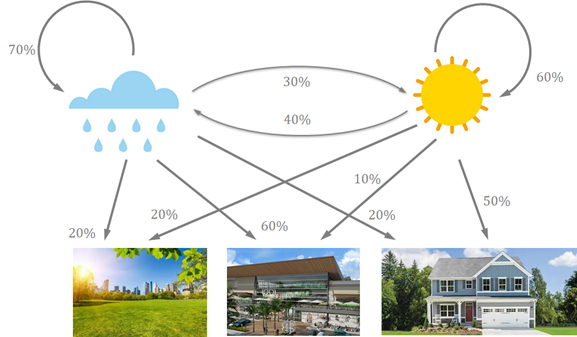

In [0]:
 # Criação do espaço de estados e as condições iniciais
states = ['Parque', 'Shopping', 'Casa']
hidden_states = ['Chuva', 'Sol']
pi = [0.3, 0.7]
state_space = pd.Series(pi, index=hidden_states, name='states')
 
# Criando a matriz de transição A (MxM, onde M é o #estados possíveis)
#   = probabilidade de transição de estados dado estado anterior
a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]
print('\nMatriz de transição A:')
print(a_df)
a = a_df.values
 
# Criando a matriz de emissão B (MxV onde V é o #observações possíveis)
#      = probabilidade de observação dado um estado
observable_states = states
 
b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]
print('\nMatriz de emissão B:')
print(b_df)
b = b_df.values
 
# Sequência de observação codificada numericamente
obs_map = {'Parque':0, 'Shopping':1, 'Casa':2}
obs = np.array([1,1,2,1,0,1,2,1,0,2,2,1,1,0,1])
 
inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print('\nSequência de observações com respectivo código')
print( pd.DataFrame(np.column_stack([obs, obs_seq]),
                columns=['Código', 'Observação']) )
 

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)
 
# result
state_map = {0:'Chuva', 1:'Sol'}
state_path = [state_map[v] for v in path]
 
print(pd.DataFrame()
 .assign(Observação=obs_seq)
 .assign(MelhorSequência=state_path))


Matriz de transição A:
      Chuva  Sol
Chuva   0.7  0.3
Sol     0.4  0.6

Matriz de emissão B:
      Parque Shopping Casa
Chuva    0.2      0.6  0.2
Sol      0.4      0.1  0.5

Sequência de observações com respectivo código
   Código Observação
0       1   Shopping
1       1   Shopping
2       2       Casa
3       1   Shopping
4       0     Parque
5       1   Shopping
6       2       Casa
7       1   Shopping
8       0     Parque
9       2       Casa
10      2       Casa
11      1   Shopping
12      1   Shopping
13      0     Parque
14      1   Shopping

Start Walk Forward

s=0 and t=1: phi[0, 1] = 0.0
s=1 and t=1: phi[1, 1] = 0.0
s=0 and t=2: phi[0, 2] = 0.0
s=1 and t=2: phi[1, 2] = 0.0
s=0 and t=3: phi[0, 3] = 0.0
s=1 and t=3: phi[1, 3] = 1.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=0 and t=5: phi[0, 5] = 0.0
s=1 and t=5: phi[1, 5] = 1.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=0 and t=7: phi[0, 7] = 0.0
s=1 and t=7: phi[1, 7] = 1.0
s=0 and t=8

<font color='green'> 
### Seu trabalho </font>
<font color='green'> 
Suponha que alguém lance uma moeda dez vezes e forneça o resultado: $HTTHHHHHTH$ onde $H$ é cara e $T$ é coroa. Porém, o lançador tem duas moedas e muda aleatoriamente de uma moeda para outra. Uma moeda é equilibrada $F$ e a outra é tendenciosa $B$, que resulta em $H$ 80% das vezes que é lançada. Após cada sorteio, o jogador pode manter a mesma moeda (probabilidade $0,8$), mudar para a outra moeda ($0,20$). Além disso, a probabilidade de começar com a moeda equilibrada é $0,8$. Com essas informações,
</font>

<font color='green'> 

1. Qual a probabilidade dessa sequência ocorrer?
2. Qual a sequência mais provável das moedas utilizadas?
1. Qual a probabilidade dessa sequência ocorrer cem vezes? Estude o fenômeno de *underflow* e proponha a solução.

</font>